In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import rcParams
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Import train data
ne_train = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/ne_train.csv")
s_train = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/s_train.csv")

# Import test data
ne_test = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/ne_test.csv")
s_test = pd.read_csv("/Users/Huey.ts/Desktop/STAT_390/data/s_test.csv")

# Plots
- Both have time trends --> may be non-stationary/trend stationary

<Axes: title={'center': 'Time series graph of COVID-19 confirmed cases in New England'}, xlabel='date', ylabel='Number of confirmed cases'>

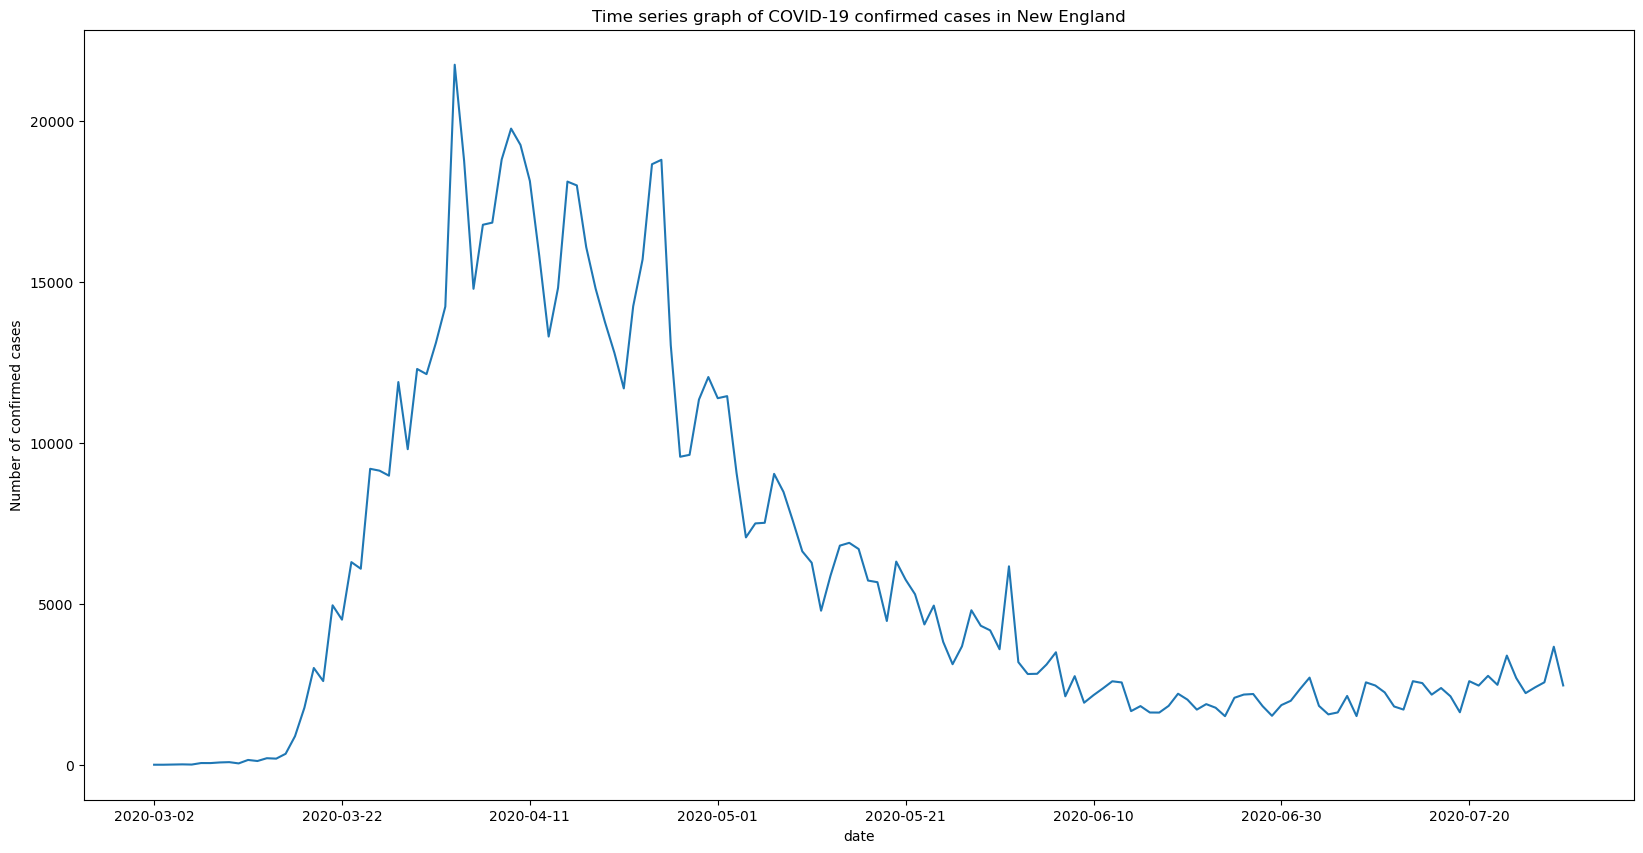

In [3]:
ne_train.plot(x = "date", y = "covid_19_confirmed_cases", figsize = (20,10),
             title = "Time series graph of COVID-19 confirmed cases in New England",
             ylabel = "Number of confirmed cases",
             legend = False)

<Axes: title={'center': 'Time series graph of COVID-19 confirmed cases in the South'}, xlabel='date', ylabel='Number of confirmed cases'>

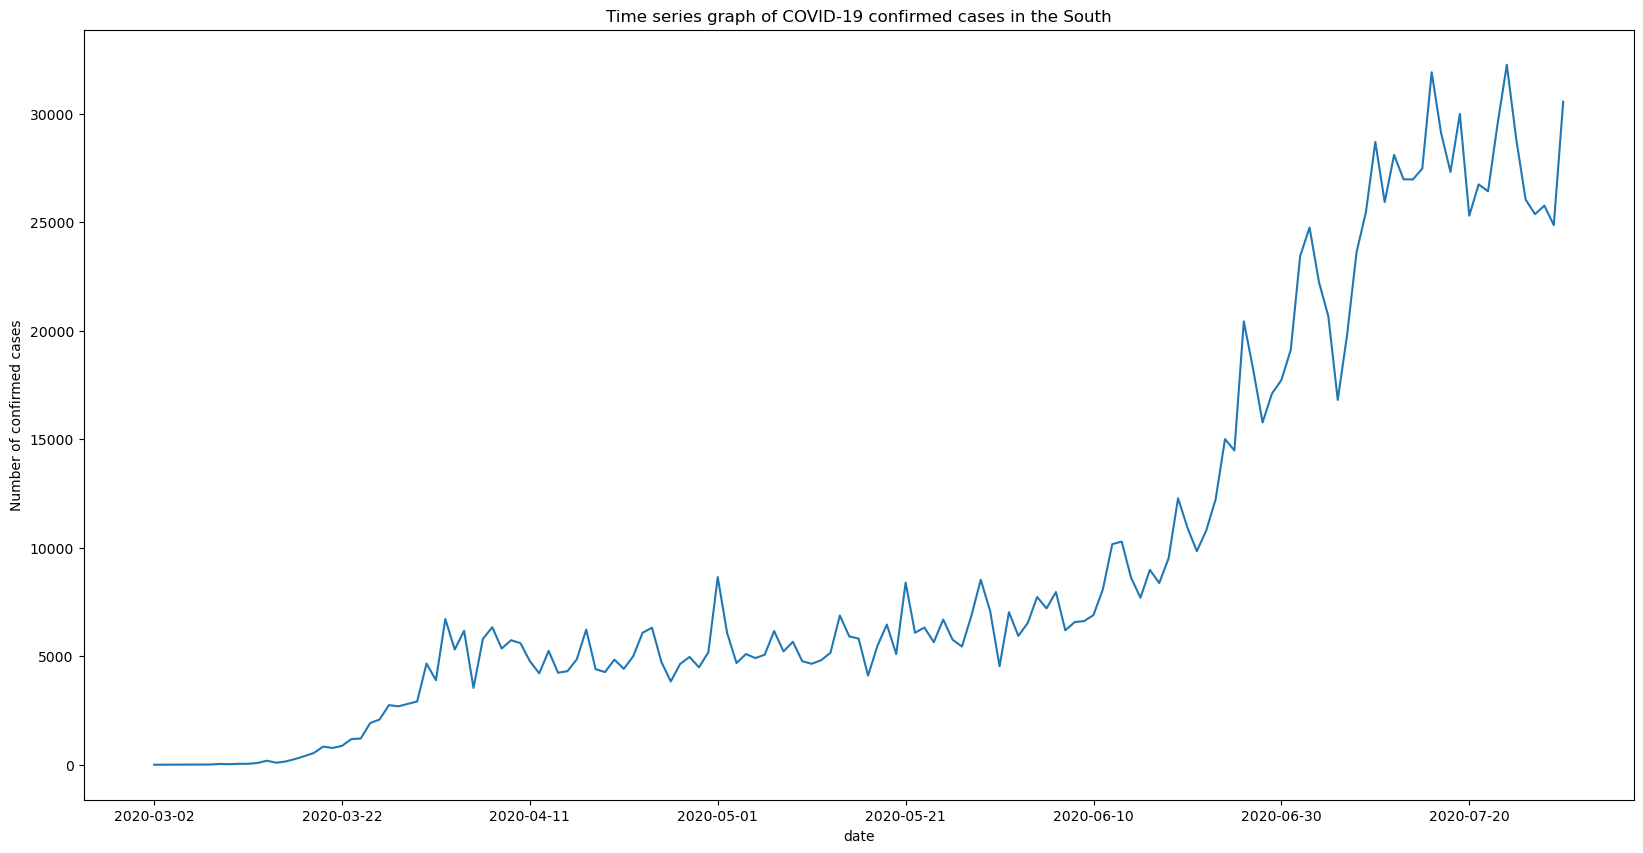

In [4]:
s_train.plot(x = "date", y = "covid_19_confirmed_cases", figsize = (20,10),
             title = "Time series graph of COVID-19 confirmed cases in the South",
             ylabel = "Number of confirmed cases",
             legend = False)

# Seasonality
- A time series with a trend or seasonality is non-stationary
- Remove early values of 0 --> seasonal_decompose to check seasonality
- NE: Seasonality
- S: Seasonality

In [5]:
ne_train.date = pd.to_datetime(ne_train.date)
s_train.date = pd.to_datetime(ne_train.date)

In [6]:
ne_train.set_index("date", inplace = True)
s_train.set_index("date", inplace = True)

In [7]:
ne_decomposition = seasonal_decompose(ne_train["covid_19_confirmed_cases"], model = "additive")

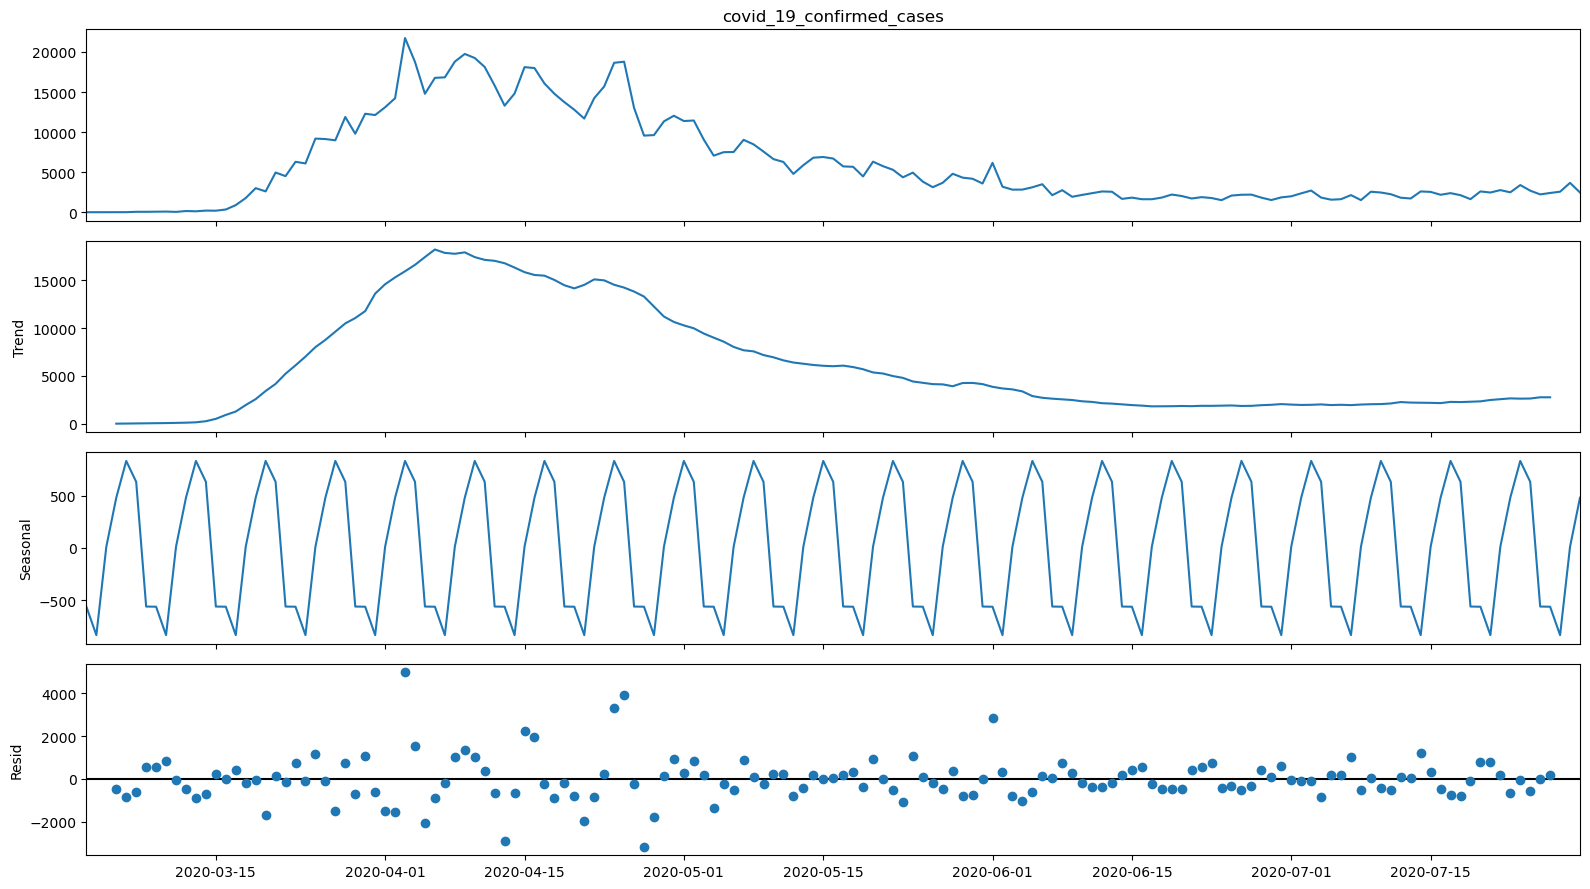

In [13]:
fig = ne_decomposition.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [10]:
s_decomposition = seasonal_decompose(s_train["covid_19_confirmed_cases"], model = "additive")

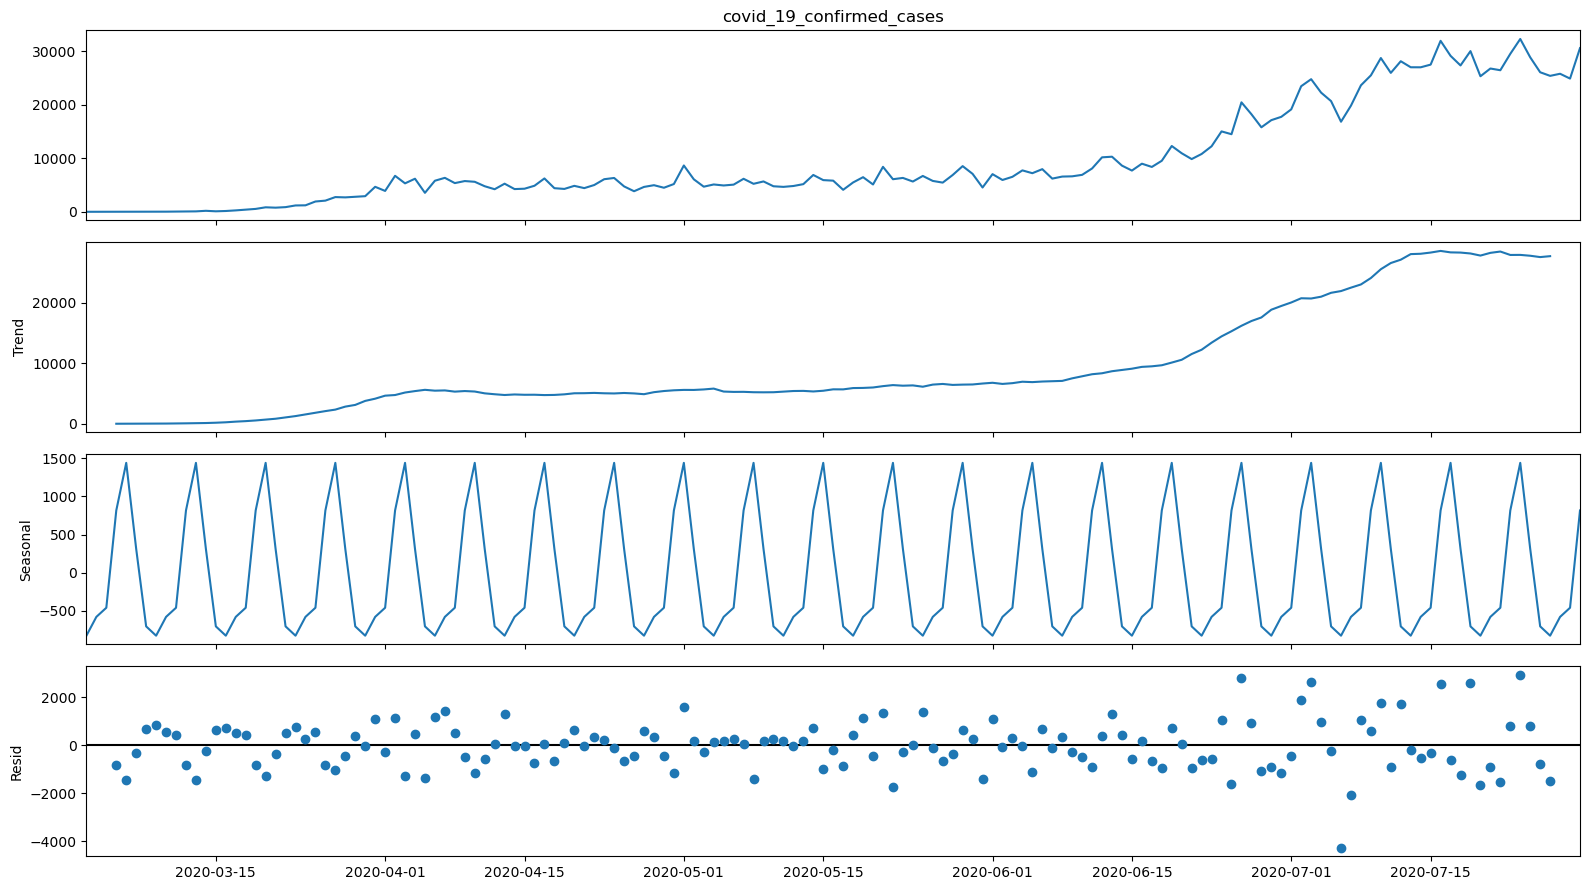

In [14]:
fig = s_decomposition.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

# Stationary Tests

- Before differencing & removing trends
    - NE: adf (non-stationary) & kpss (non-stationary) --> non-stationary
    - S: adf (non-stationary) & kpss (non-stationary) --> non-stationary

In [6]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [7]:
adf_test(ne_train["covid_19_confirmed_cases"])

Results of Dickey-Fuller Test:
Test Statistic                  -2.600670
p-value                          0.092859
#Lags Used                       9.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


In [8]:
adf_test(s_train["covid_19_confirmed_cases"])

Results of Dickey-Fuller Test:
Test Statistic                  -0.593975
p-value                          0.872338
#Lags Used                      14.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [9]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [10]:
kpss_test(ne_train["covid_19_confirmed_cases"])

Results of KPSS Test:
Test Statistic           0.560788
p-value                  0.027976
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [11]:
kpss_test(s_train["covid_19_confirmed_cases"])

Results of KPSS Test:
Test Statistic           1.42055
p-value                  0.01000
#Lags Used               8.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


/var/folders/47/fwys2xf93ng018yvjrnr0hmm0000gn/T/ipykernel_15950/3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


## Remove Non-stationarity

### Remove trend
- Log transform
- NE: adf (stationary) & kpss (stationary) --> strictly stationary --> no need to difference
- S: adf (non-stationary) & kpss (non-stationary) --> need to difference

In [12]:
ne_train.covid_19_confirmed_cases = np.log(ne_train.covid_19_confirmed_cases)

<Axes: title={'center': 'Time series graph of COVID-19 confirmed cases in New England'}, xlabel='date', ylabel='Number of confirmed cases'>

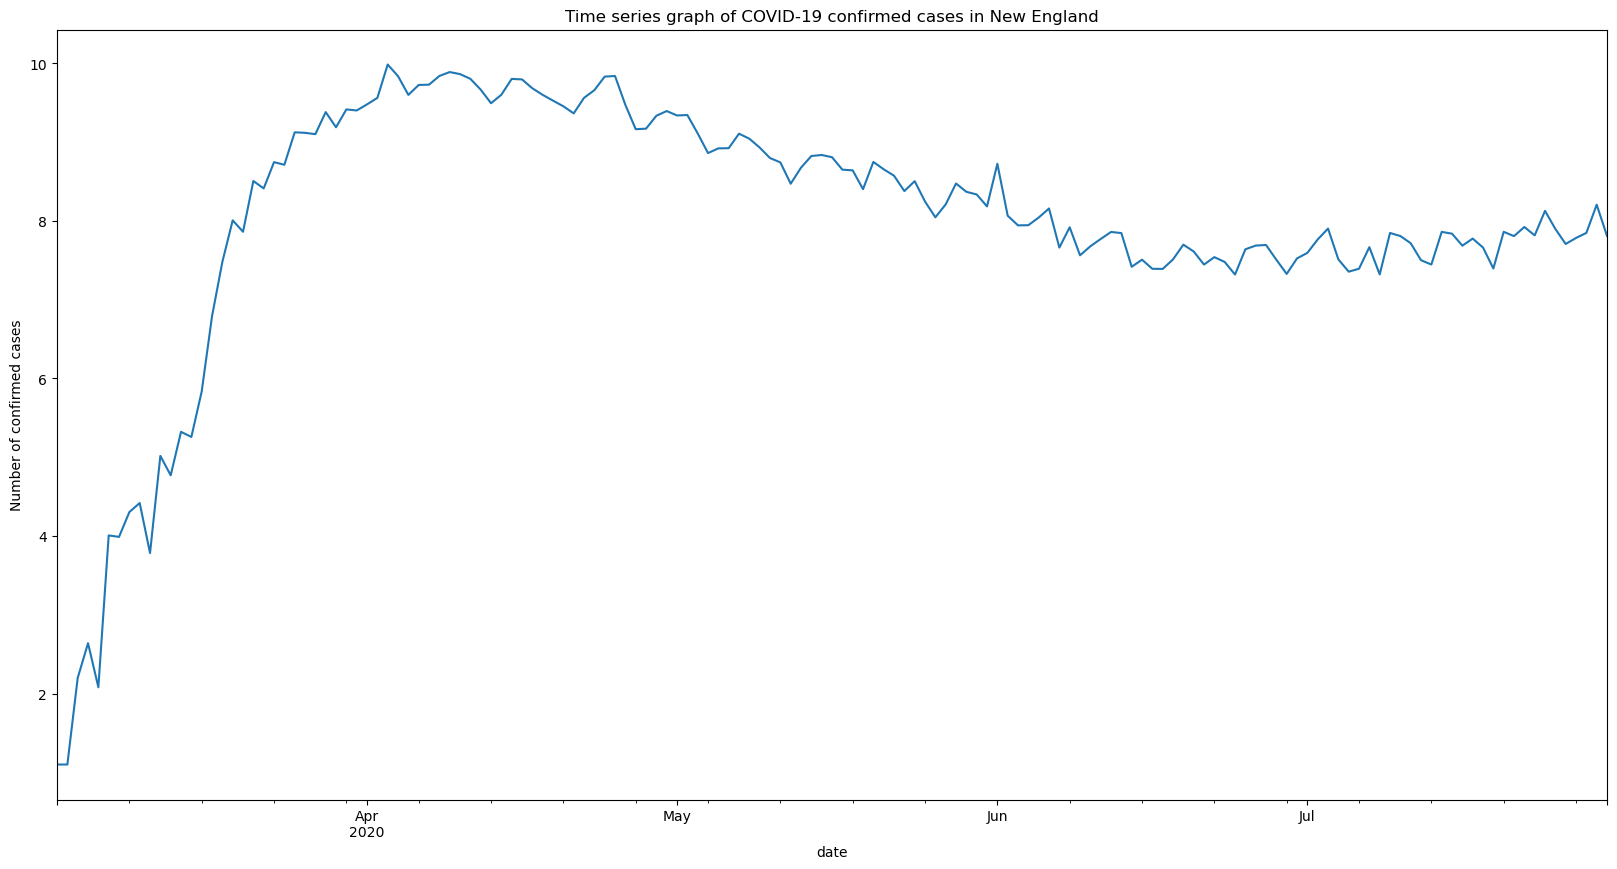

In [13]:
ne_train.plot(x = "date", y = "covid_19_confirmed_cases", figsize = (20,10),
             title = "Time series graph of COVID-19 confirmed cases in New England",
             ylabel = "Number of confirmed cases",
             legend = False)

In [14]:
adf_test(ne_train.covid_19_confirmed_cases)

Results of Dickey-Fuller Test:
Test Statistic                  -4.187454
p-value                          0.000692
#Lags Used                      14.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [15]:
kpss_test(ne_train.covid_19_confirmed_cases)

Results of KPSS Test:
Test Statistic           0.267417
p-value                  0.100000
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/var/folders/47/fwys2xf93ng018yvjrnr0hmm0000gn/T/ipykernel_15950/3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [16]:
s_train.covid_19_confirmed_cases = np.log(s_train.covid_19_confirmed_cases)

<Axes: title={'center': 'Time series graph of COVID-19 confirmed cases in the South'}, xlabel='date', ylabel='Number of confirmed cases'>

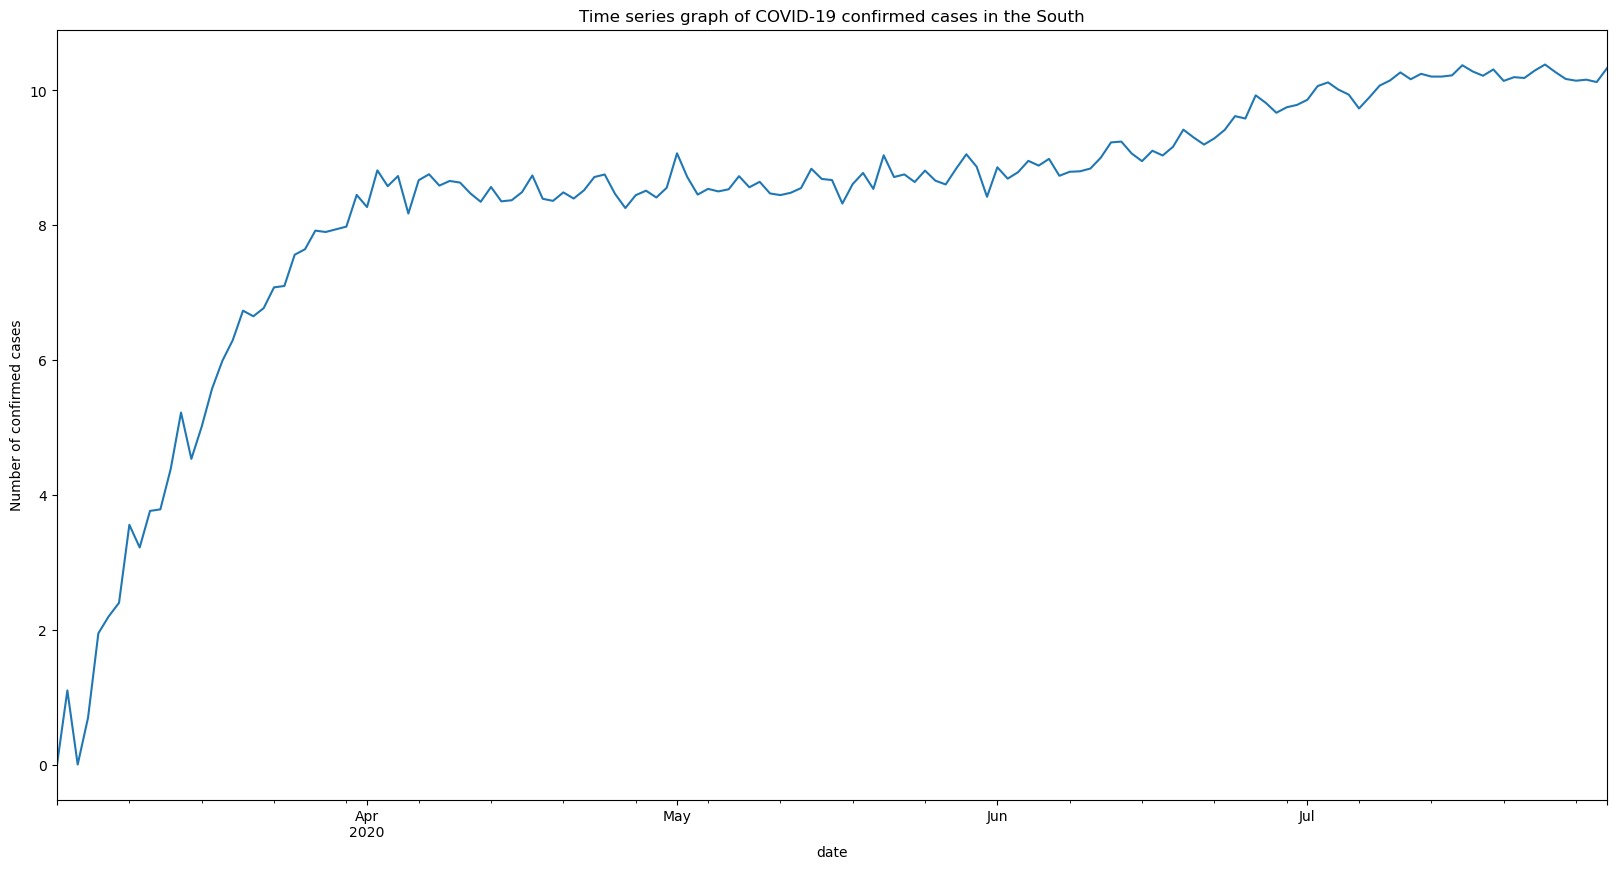

In [17]:
s_train.plot(x = "date", y = "covid_19_confirmed_cases", figsize = (20,10),
             title = "Time series graph of COVID-19 confirmed cases in the South",
             ylabel = "Number of confirmed cases",
             legend = False)

In [18]:
adf_test(s_train.covid_19_confirmed_cases)

Results of Dickey-Fuller Test:
Test Statistic                  -1.495770
p-value                          0.535603
#Lags Used                      11.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [19]:
kpss_test(s_train.covid_19_confirmed_cases)

Results of KPSS Test:
Test Statistic           1.178651
p-value                  0.010000
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/var/folders/47/fwys2xf93ng018yvjrnr0hmm0000gn/T/ipykernel_15950/3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


### Remove seasonality
- S: differecing = 1 --> adf (stationary) & kpss (non-stationary) --> series is difference stationary
    - Cannot make it strictly non-stationary
    - Tried not log transformation & differencing --> series becomes trend stationary
    - Could still have some unremoved trends & seasonlity --> Check ACF & PACF & Potential SARIMA model

In [20]:
s_train_y = pd.Series(s_train["covid_19_confirmed_cases"]).diff(periods = 1).dropna()

s_train_transformed = pd.merge(s_train.date, s_train_y, left_index=True, right_index=True)

<Axes: title={'center': 'Time series graph of COVID-19 confirmed cases in the South'}, xlabel='date', ylabel='Number of confirmed cases'>

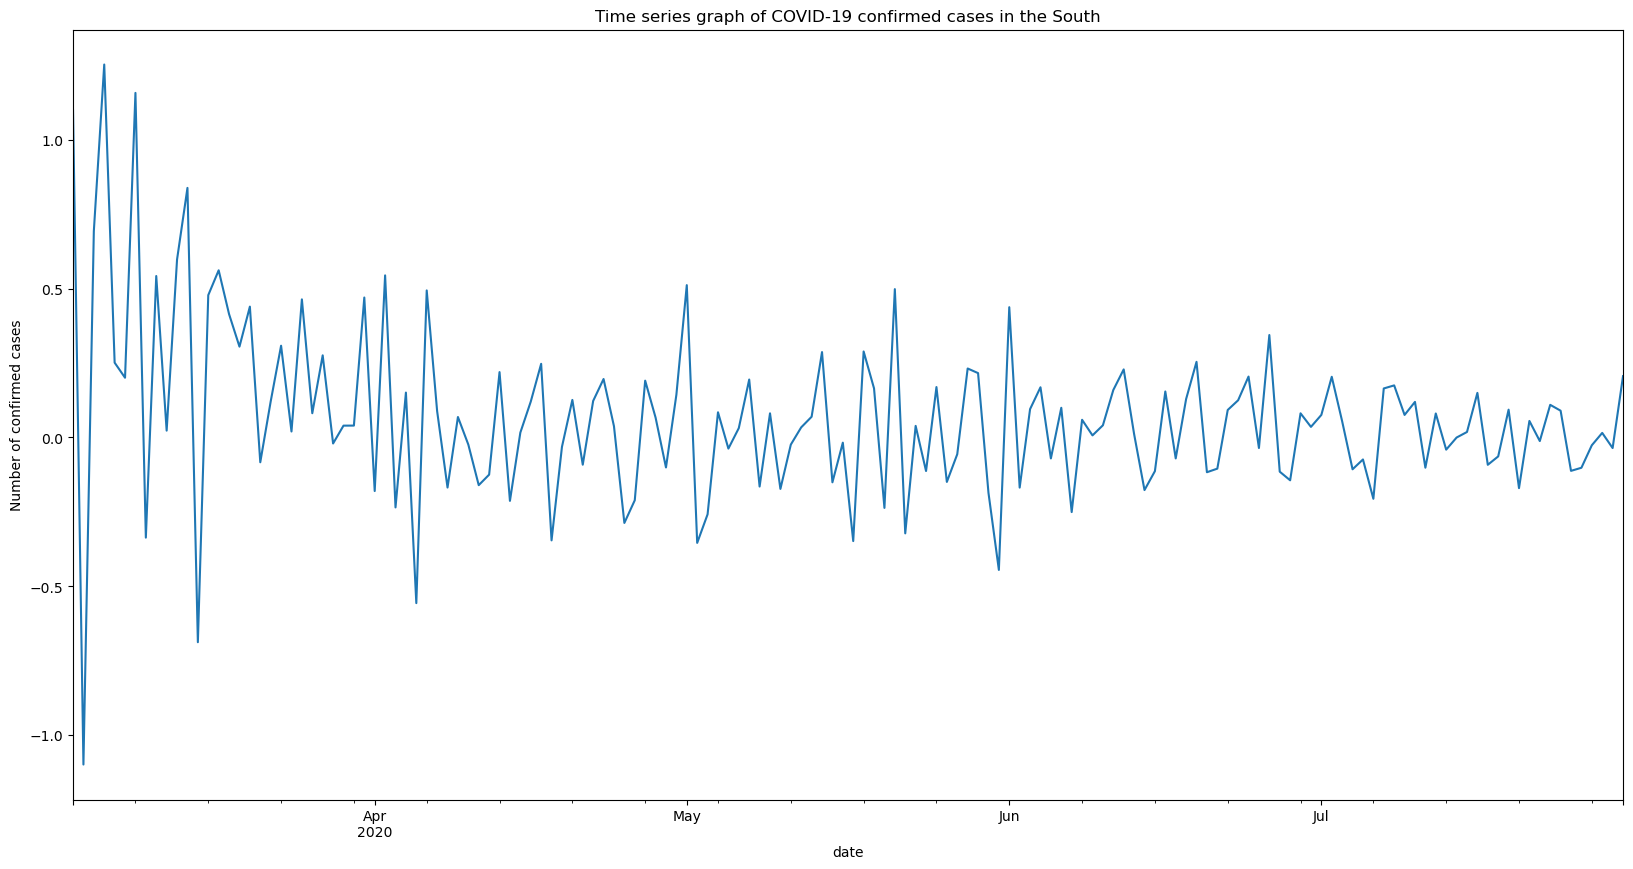

In [21]:
s_train_transformed.plot(x = "date", y = "covid_19_confirmed_cases", figsize = (20,10),
             title = "Time series graph of COVID-19 confirmed cases in the South",
             ylabel = "Number of confirmed cases",
             legend = False)

In [22]:
adf_test(s_train_y)

Results of Dickey-Fuller Test:
Test Statistic                  -4.651526
p-value                          0.000104
#Lags Used                      10.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [23]:
kpss_test(s_train_y)

Results of KPSS Test:
Test Statistic           0.918802
p-value                  0.010000
#Lags Used               6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/var/folders/47/fwys2xf93ng018yvjrnr0hmm0000gn/T/ipykernel_15950/3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


# ACF
- When a clear trend exists in a time series, the autocorrelation tends to be high at small lags like 1 or 2
- When seasonality exists, the autocorrelation goes up periodically at larger lags
- NE: no clear trend; no seasonality
    - Tail off is observed --> AR (AutoRegressive Model)
- S: no clear trend; no seasonality
    - Tail off is observed --> AR (AutoRegressive Model)

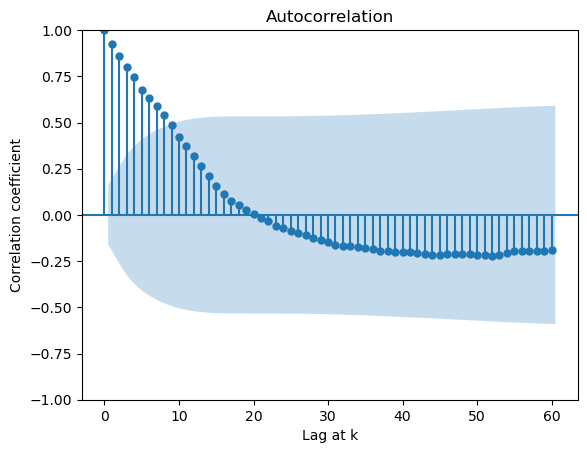

In [24]:
fig = tsaplots.plot_acf(ne_train["covid_19_confirmed_cases"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

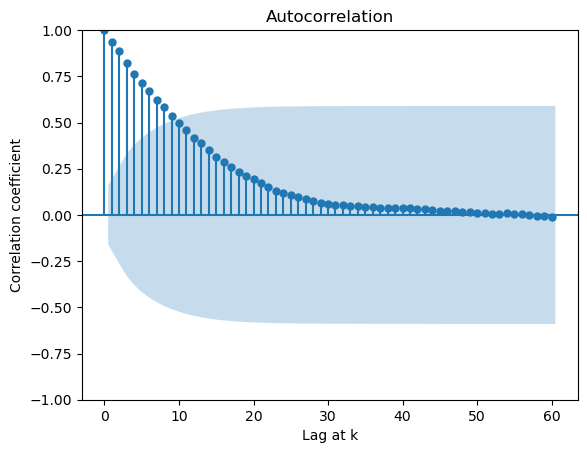

In [25]:
fig = tsaplots.plot_acf(s_train["covid_19_confirmed_cases"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

# PACF
- NE: Cut off at lag 1; Does not tail off
- S: Cut off at lag 1; Does not tail off

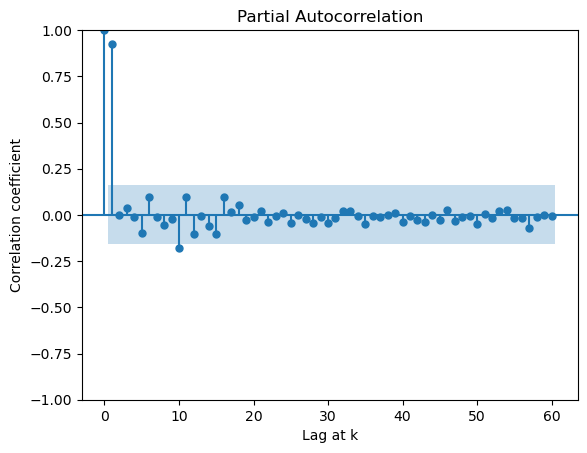

In [26]:
fig = tsaplots.plot_pacf(ne_train["covid_19_confirmed_cases"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

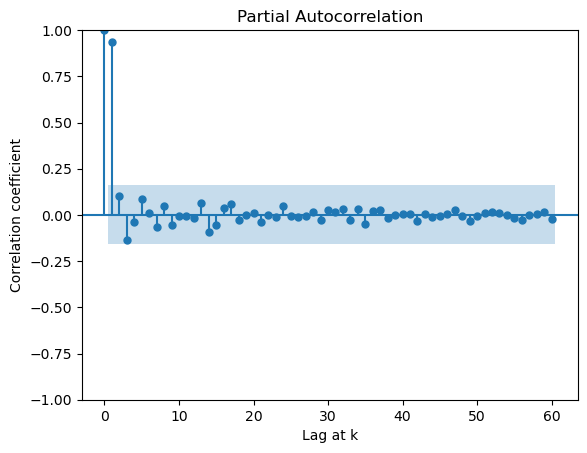

In [27]:
fig = tsaplots.plot_pacf(s_train["covid_19_confirmed_cases"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

## NE Model
- (1, 0, 0)
    - AR Model
    - ACF graph shows tail off
    - No need to difference 
    - PACF shows cut off at lag 1
- Residual stats show that residual looks like white noise with normal distribution and mean around 0
- ACF and PACF plots of residuals show barely any significant spikes for larger lags
    - Residuals are close to white noise
    - No bias in prediction
- Fitted train plot shows over-fitting
- MAE is reasonably good (574 confirmed cases)
- (2, 1, 0) = Best Model = MAE (453 confirmed cases)

In [28]:
ne_train_transformed = pd.merge(ne_train.date, ne_train["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
ne_test_transformed = pd.merge(ne_test.date, ne_test["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)

In [29]:
ne_train_transformed.set_index("date", inplace = True)
ne_test_transformed.set_index("date", inplace = True)

## (1,0,0) Model

In [30]:
ne_model = ARIMA(ne_train_transformed, order=(1,0,0))
ne_model_fit = ne_model.fit()

/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


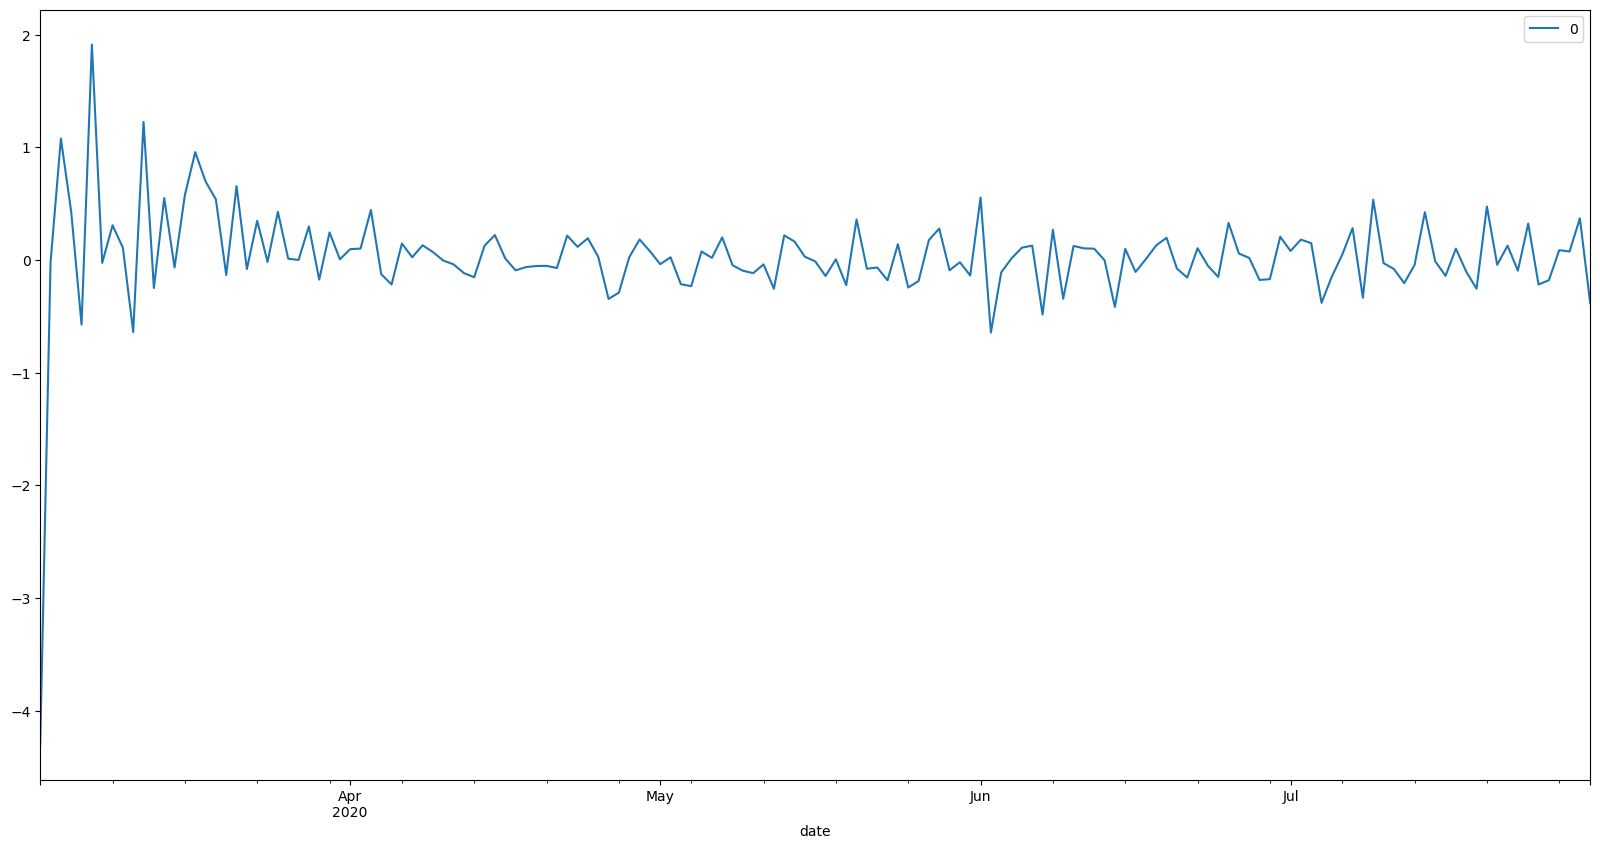

In [31]:
# line plot of residuals
residuals = DataFrame(ne_model_fit.resid)
residuals.plot(figsize = (20,10))
plt.show()

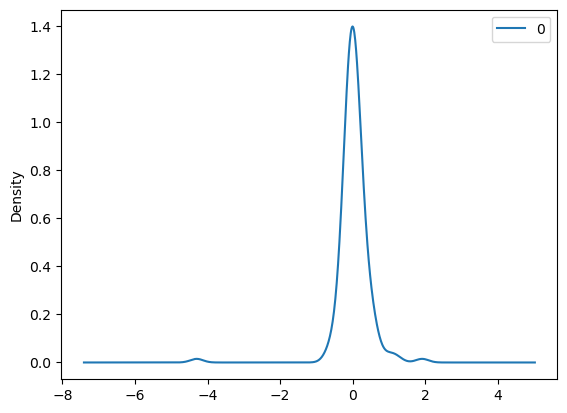

In [32]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [33]:
# summary stats of residuals
print(residuals.describe())

                0
count  151.000000
mean     0.028331
std      0.477224
min     -4.298317
25%     -0.116065
50%      0.008351
75%      0.156575
max      1.911961


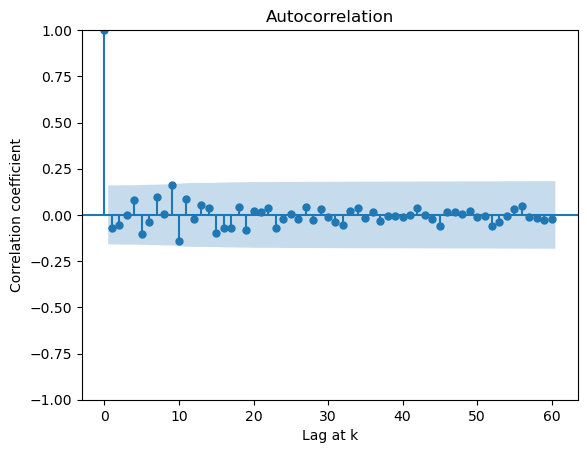

In [34]:
# ACF plot of residuals
fig = tsaplots.plot_acf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

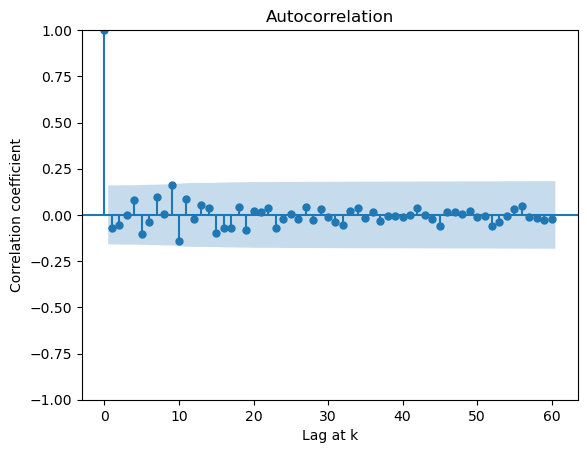

In [35]:
# PACF plot of residuals
fig = tsaplots.plot_acf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

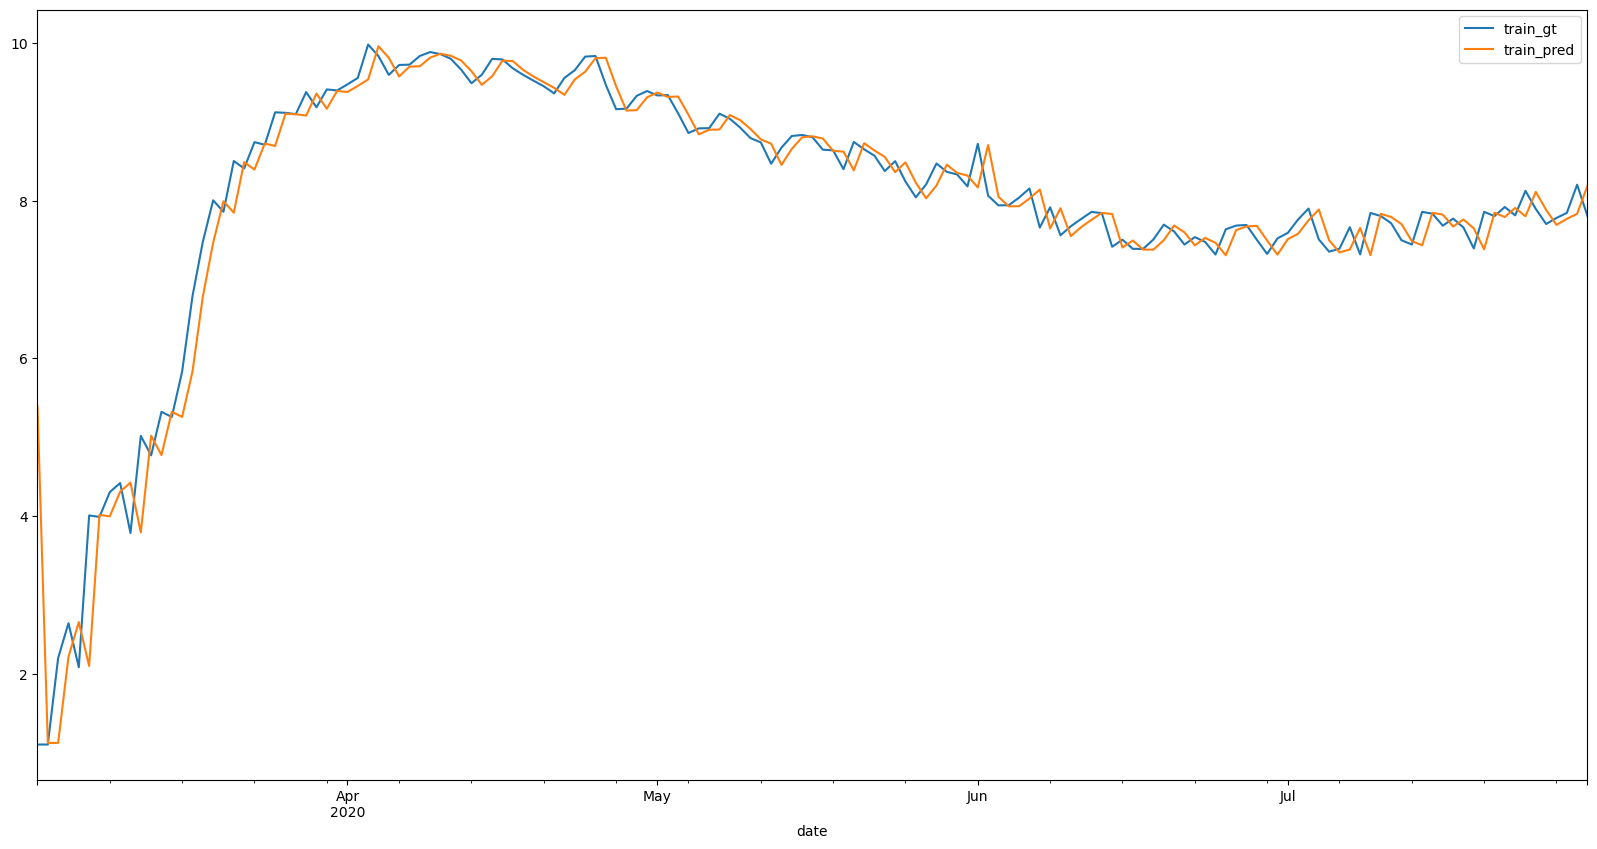

In [36]:
# Visualizing train data fitted values
ne_train_pred = ne_model_fit.fittedvalues
pd.concat([ne_train_transformed, ne_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

## NE Model Forecast

In [37]:
ne_test_transformed.index = pd.to_datetime(ne_test_transformed.index)

In [38]:
ne_test_pred = ne_model_fit.predict(start = len(ne_train_transformed), 
                                    end = len(ne_train_transformed) + len(ne_test_transformed) -1)

In [39]:
ne_test_pred = np.exp(ne_test_pred)

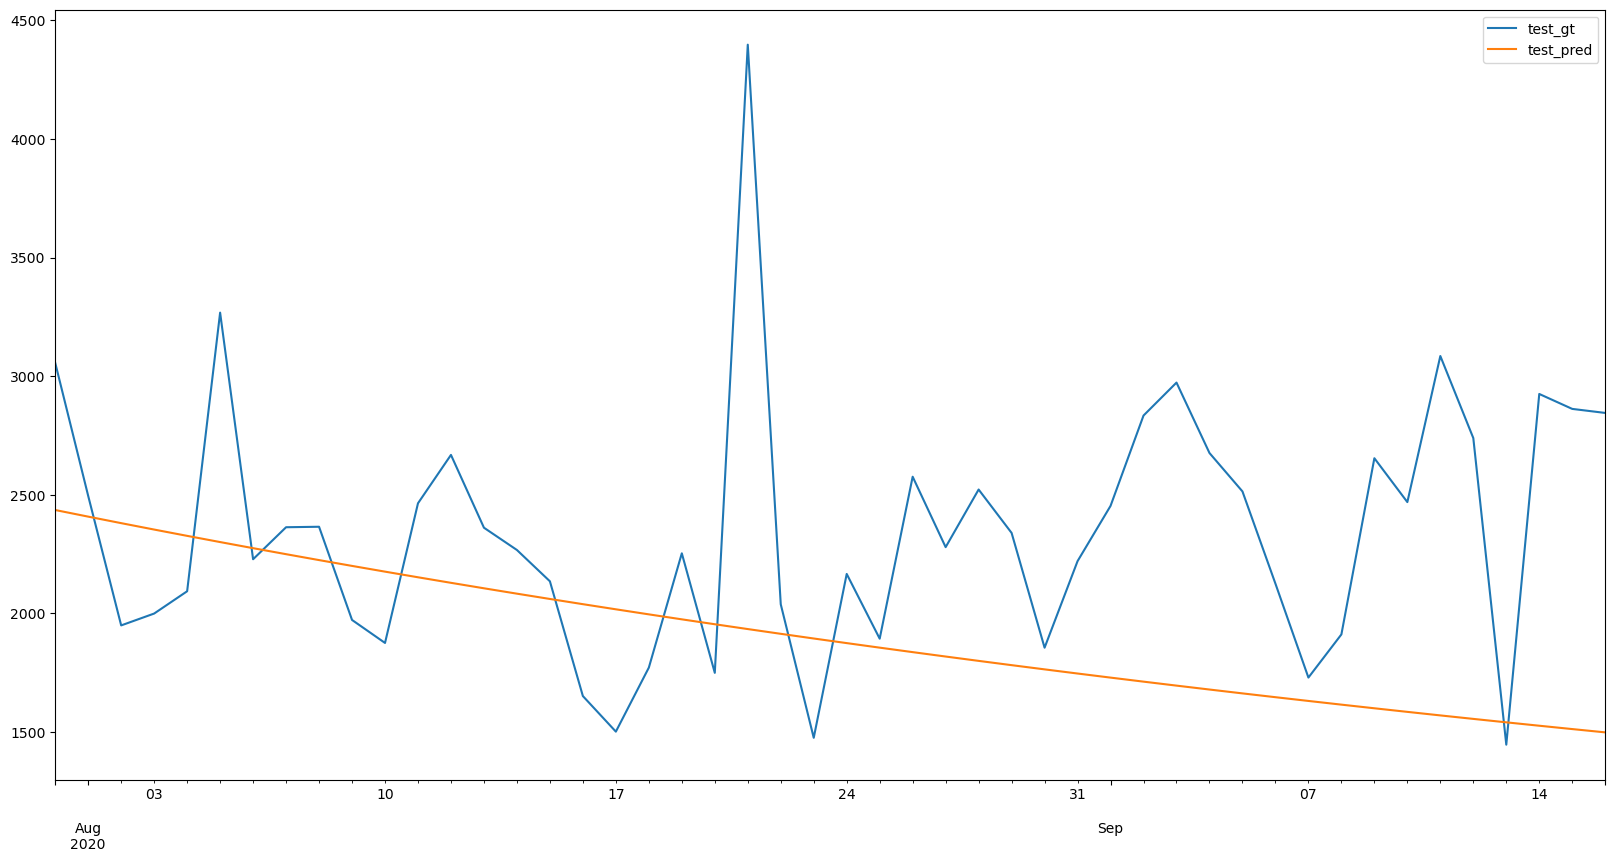

In [40]:
# Visualizing test data fitted values
pd.concat([ne_test_transformed, ne_test_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])

In [41]:
# MAE
mean_absolute_error(ne_test_transformed, ne_test_pred)

574.1854997062104

## (2,1,0) Model

In [42]:
ne_model = ARIMA(ne_train_transformed, order=(2,1,0))
ne_model_fit = ne_model.fit()

/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


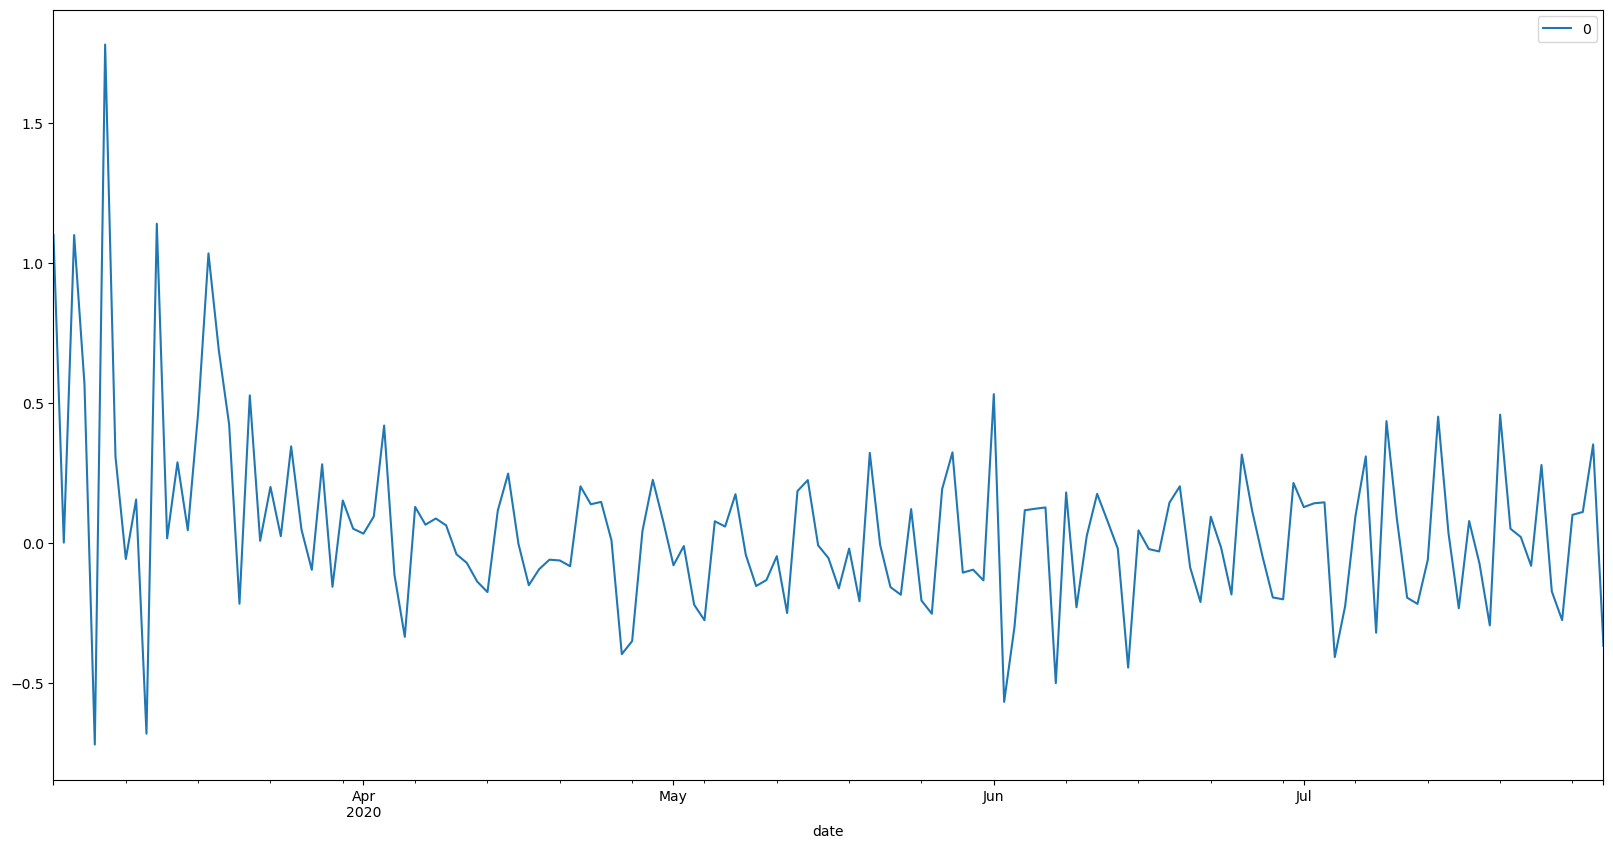

In [43]:
# line plot of residuals
residuals = DataFrame(ne_model_fit.resid)
residuals.plot(figsize = (20,10))
plt.show()

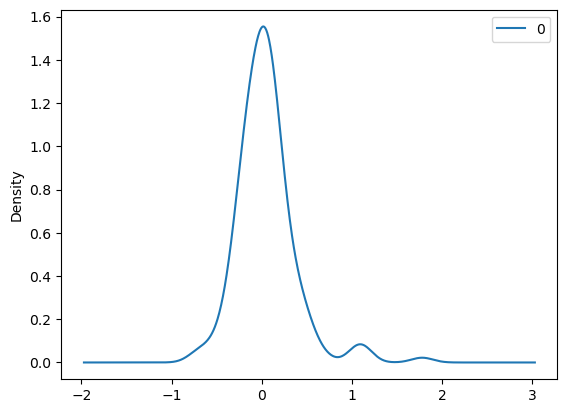

In [44]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [45]:
# summary stats of residuals
print(residuals.describe())

                0
count  151.000000
mean     0.048434
std      0.326210
min     -0.721288
25%     -0.145539
50%      0.022851
75%      0.152275
max      1.779419


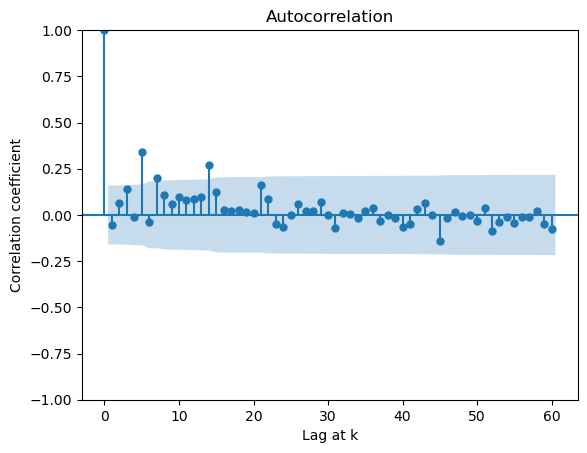

In [46]:
# ACF plot of residuals
fig = tsaplots.plot_acf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

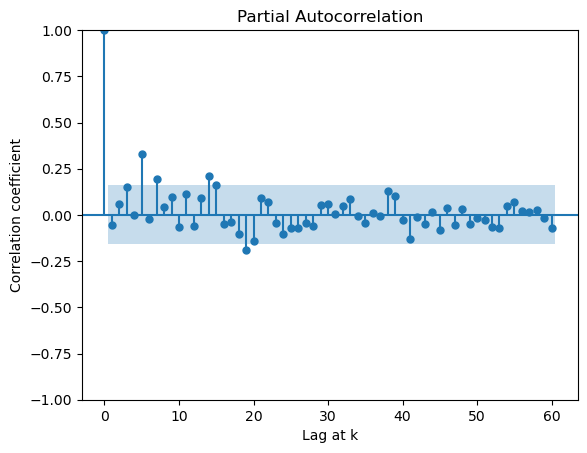

In [47]:
# ACF plot of residuals
fig = tsaplots.plot_pacf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

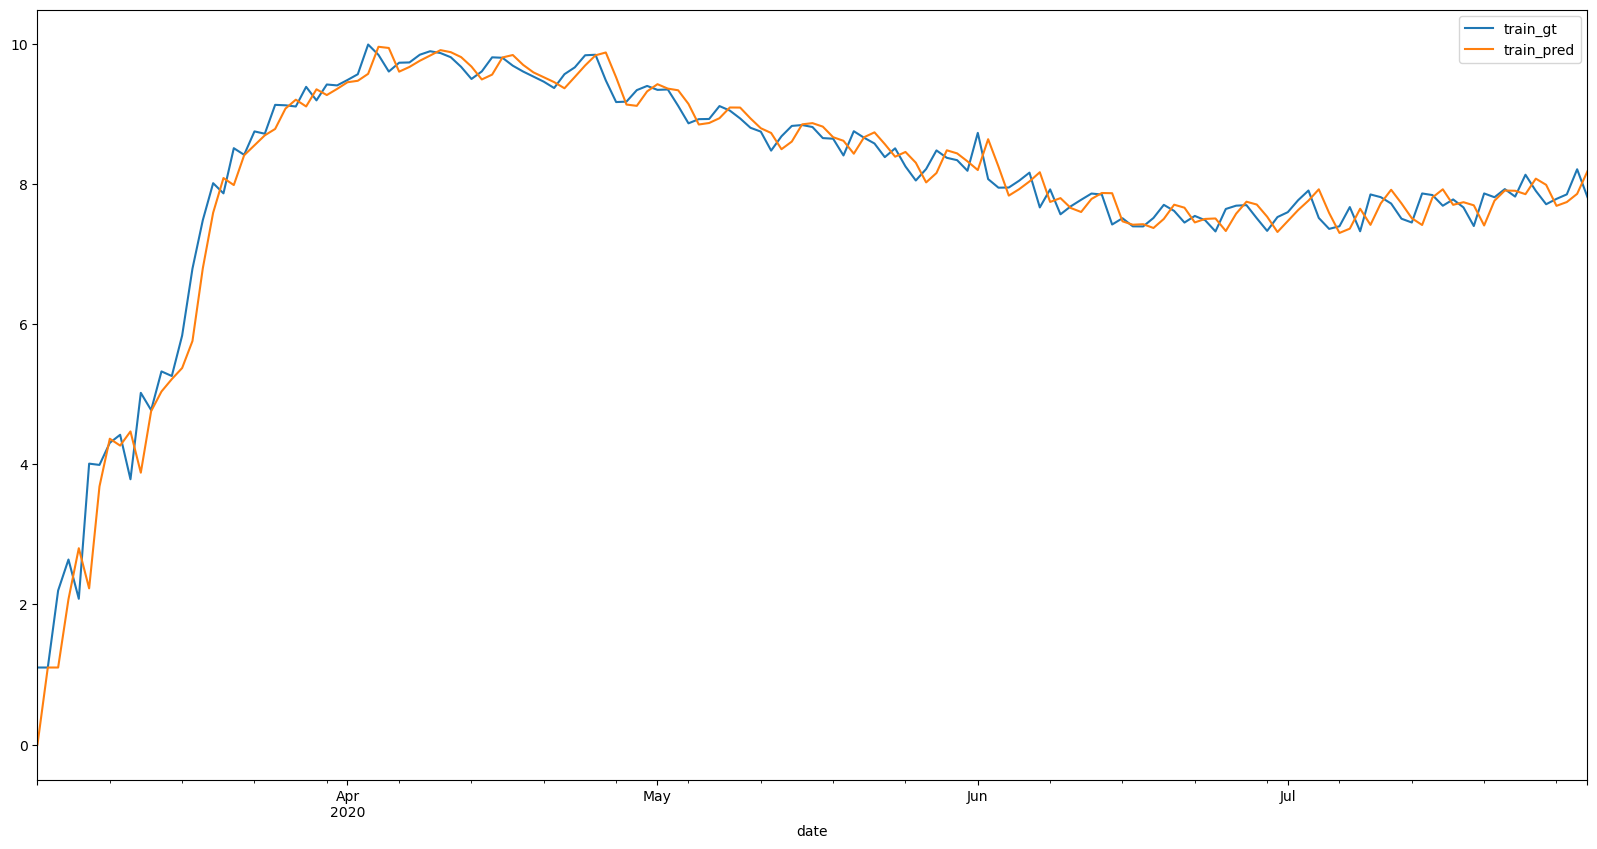

In [48]:
# Visualizing train data fitted values
ne_train_pred = ne_model_fit.fittedvalues
pd.concat([ne_train_transformed, ne_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

## NE Model Forecast

In [49]:
ne_test_pred = ne_model_fit.predict(start = len(ne_train_transformed), 
                                    end = len(ne_train_transformed) + len(ne_test_transformed) -1)

In [50]:
ne_test_pred = np.exp(ne_test_pred)

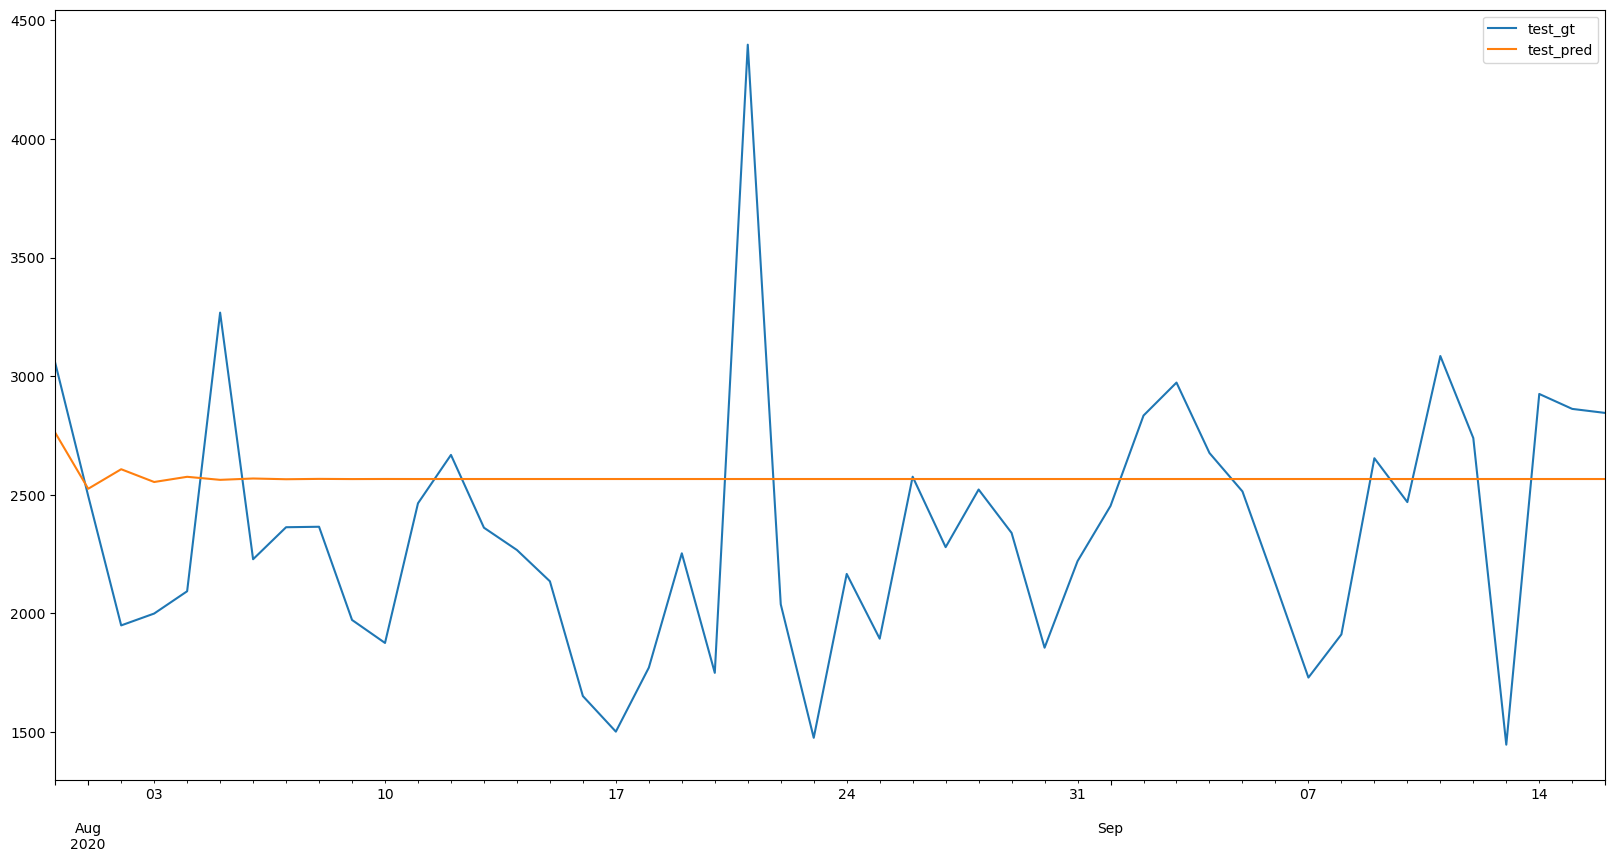

In [51]:
# Visualizing test data fitted values
pd.concat([ne_test_transformed, ne_test_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])

In [52]:
# MAE
mean_absolute_error(ne_test_transformed, ne_test_pred)

453.4858190970338

## S Model
- (1, 1, 0)
    - AR Model
    - ACF graph shows tail off
    - Difference = 1 --> Series is difference stationary 
    - PACF shows cut off at lag 1 but performs too bad
- Residual stats show that residual looks like white noise with normal distribution and mean around 0
- ACF and PACF plots of residuals show barely any significant spikes for larger lags
    - Residuals are close to white noise
    - No bias in prediction
- Fitted train plot shows over-fitting
- MAE is quite large good (13097 confirmed cases)
- (14,1,0) Best Model = MAE is significanly lower (6670 confirmed cases) & less over-fitting

In [53]:
s_train_transformed = pd.merge(s_train.date, s_train["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
s_test_transformed = pd.merge(s_test.date, s_test["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)

In [54]:
s_train_transformed.set_index("date", inplace = True)
s_test_transformed.set_index("date", inplace = True)

In [55]:
s_model = ARIMA(s_train_transformed, order=(14,1,0))
s_model_fit = s_model.fit()

/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Huey.ts/miniconda3/envs/tf/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


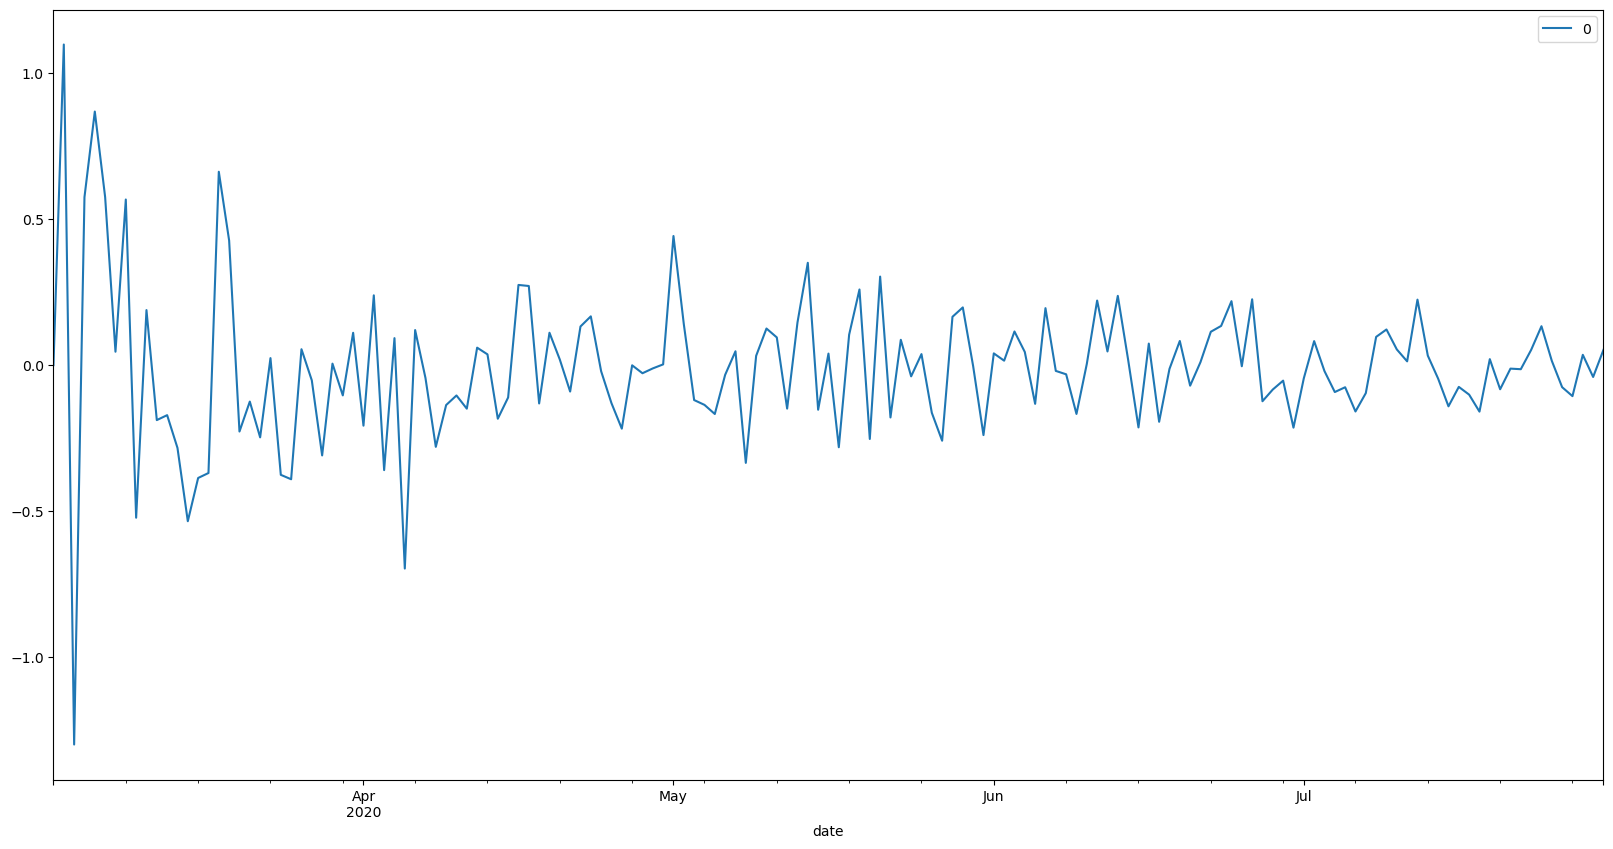

In [56]:
# line plot of residuals
residuals = DataFrame(s_model_fit.resid)
residuals.plot(figsize = (20,10))
plt.show()

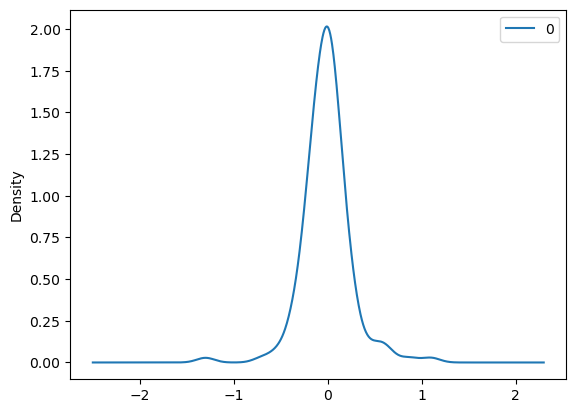

In [57]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [58]:
# summary stats of residuals
print(residuals.describe())

                0
count  151.000000
mean    -0.010746
std      0.257972
min     -1.299968
25%     -0.136455
50%     -0.011204
75%      0.095898
max      1.098612


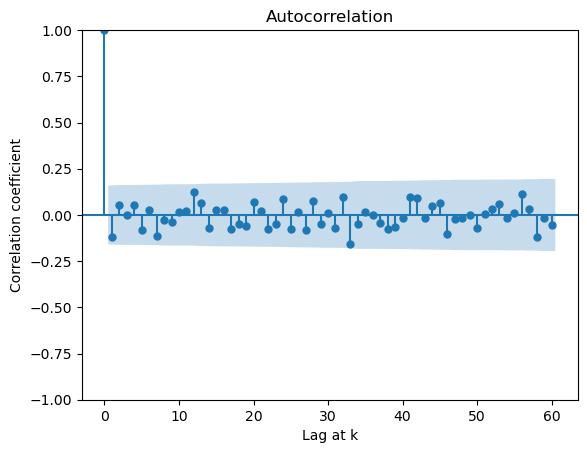

In [59]:
# ACF plot of residuals
fig = tsaplots.plot_acf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

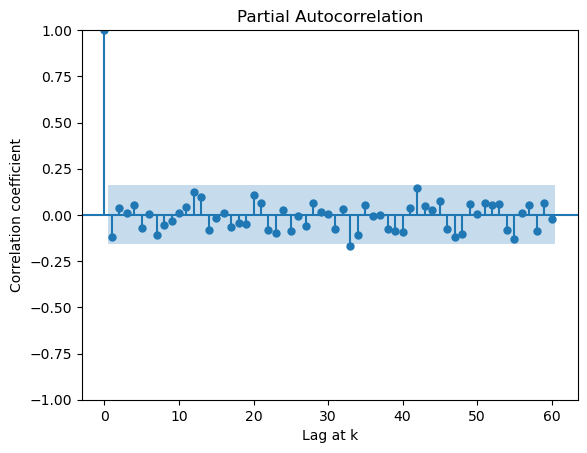

In [60]:
# ACF plot of residuals
fig = tsaplots.plot_pacf(residuals, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

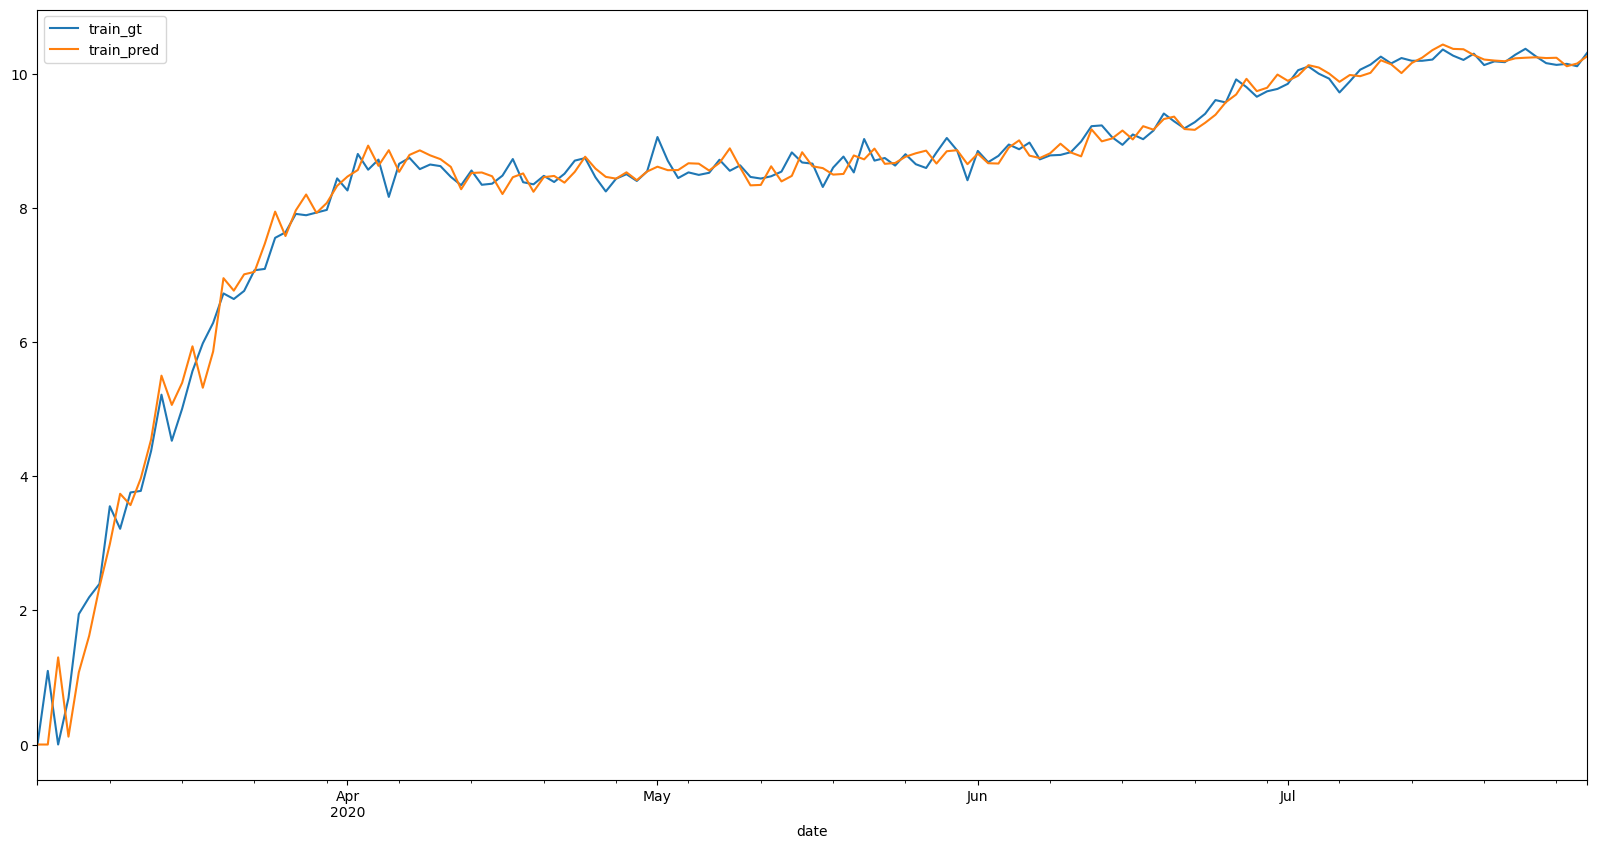

In [61]:
# Visualizing train data fitted values
s_train_pred = s_model_fit.fittedvalues
pd.concat([s_train_transformed, s_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

## S Model Forecast

In [62]:
s_test_transformed.index = pd.to_datetime(s_test_transformed.index)

In [63]:
s_test_pred = s_model_fit.predict(start = len(s_train_transformed), 
                                  end = len(s_train_transformed) + len(s_test_transformed) -1)

In [64]:
s_test_pred = np.exp(s_test_pred)

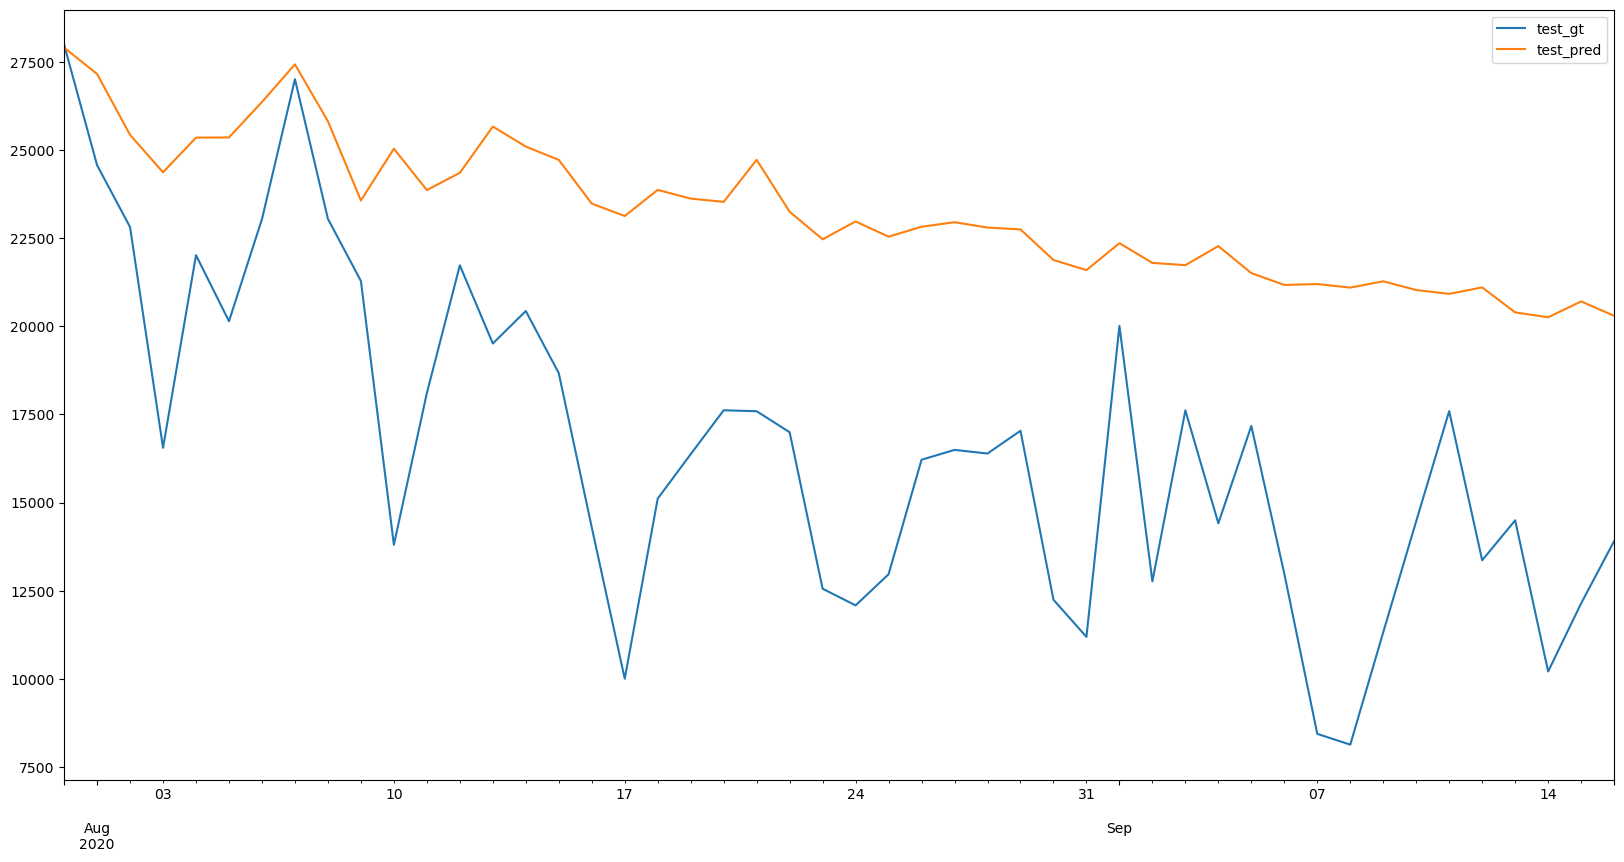

In [65]:
# Visualizing test data fitted values
pd.concat([s_test_transformed, s_test_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])

In [66]:
# MAE
mean_absolute_error(s_test_transformed, s_test_pred)

6670.072747031559